In [33]:
import numpy as np
from scipy.stats import bernoulli, binom, beta
from matplotlib import pyplot as plt
import pymc3 as pm
import arviz as az

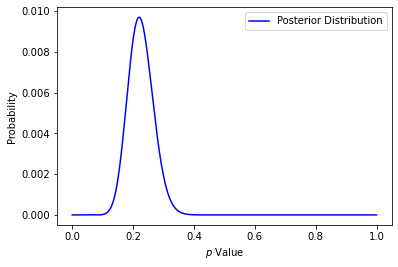

0.22022022022022023

In [22]:
def bernoulli_sampling(p, n):
    #get initial data
    initial_data = np.random.binomial(n, p)
    #get grid search for p_values
    p_vals = np.linspace(0, 1, 1000)
    #get the likelihood
    likelihood =  np.array([binom.pmf(initial_data, n, p) for p in p_vals])
    #get the posterior
    posterior = likelihood / np.sum(likelihood)
    #plot the posterior
    plt.plot(p_vals, posterior, 'b-', label='Posterior Distribution')
    plt.legend(loc='best')
    plt.xlabel(r'$p$ Value')
    plt.ylabel('Probability')
    plt.show()
    #return the MAP
    return p_vals[np.argmax(likelihood)]

bernoulli_sampling(0.2, 100)

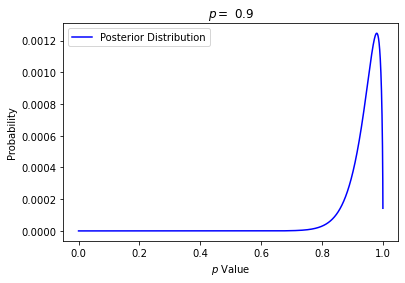

0.9796020397960205


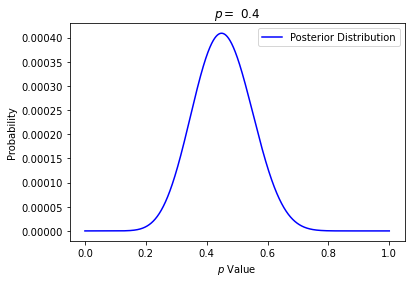

0.44895510448955106


In [25]:
def non_uniform_prior(p, n, prior):
    initial_data = np.random.binomial(n, p)
    #get initial data
    initial_data = np.random.binomial(n, p)
    #get grid search for p_values
    p_vals = np.linspace(0, 1, 10001, endpoint=False)[1:]
    #get the likelihood
    likelihood =  np.array([binom.pmf(initial_data, n, p) * prior.pdf(p) for p in p_vals])
    #get the posterior
    posterior = likelihood / np.sum(likelihood)
    #plot the posterior
    plt.plot(p_vals, posterior, 'b-', label='Posterior Distribution')
    plt.title(r'$p = $ ' + str(p))
    plt.legend(loc='best')
    plt.xlabel(r'$p$ Value')
    plt.ylabel('Probability')
    plt.show()
    #return the MAP

    return p_vals[np.argmax(posterior)]

print(non_uniform_prior(0.9 , 20, beta(5, 1.5)))
print(non_uniform_prior(0.4 , 20, beta(5, 1.5)))

Because the distribution is "skinnier" for 90% than for 40% we can expect a higher confidence from the distribution from a coin with a 90% bias.  

In [32]:
def weather_forecast():
    #set transition matrix
    transition_matrix = np.array([[0.6,0.1,0.3],
                                  [0.2,0.6,0.2],
                                  [0.3,0.4,0.3]])
    #initalize number of days
    #counting variable
    #the current weather
    #the forecast and the weather indexes and type
    days = 10
    i = 0
    current_weather = 0
    forecast = []
    weather_indices = [0, 1, 2]
    weather_type = ['sun', 'rain', 'wind']
    #loop through all the days
    while i < days:
        #get the new current weather
        current_weather = np.random.choice(weather_indices,
                                               p=transition_matrix[current_weather])
        #append the forcast
        forecast.append(weather_type[current_weather])
        #update counter
        i += 1
    #return forecast
    return forecast
print(weather_forecast())

['wind', 'rain', 'sun', 'sun', 'sun', 'sun', 'rain', 'wind', 'wind', 'wind']


/tmp/ipykernel_36081/1420026616.py:9: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lam]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


0.3456455102797751


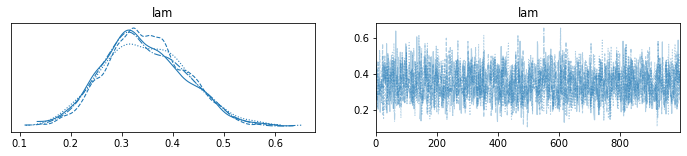

In [48]:
def posterior_sampling(data, n=1000):
    #set up pymc3 model
    with pm.Model():
        #get the beta prior for parameter lambda
        lam = pm.Beta('lam', alpha=1, beta=1)
        #distribution for observed data
        y = pm.Bernoulli('y', p=lam, observed=data)
        #sample from posterior distribution
        trace = pm.sample(n)
        #plot the posterior
        az.plot_trace(trace)
        #get and return the mean of the parameter
        lam = trace['lam']
        mean = lam.mean()
    return mean

print(posterior_sampling(bernoulli.rvs(0.2, size=30)))

/tmp/ipykernel_36081/3617758618.py:12: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(n)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 3 seconds.


179.9555632908367

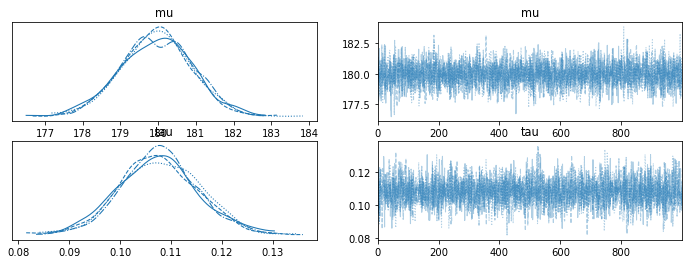

In [38]:
def height_model(observed_data, m=180, s=10, alpha=2, beta=10, n=1000):

    #set up pymc3 model
    with pm.Model():
        #normal prior for mu
        mu = pm.Normal('mu', mu=m, sigma=s)
        #gamma prior for tau
        tau = pm.Gamma('tau', alpha=alpha, beta=beta)
        #distribution for data
        obs = pm.Normal("obs", mu=mu, sigma=1/tau, observed=observed_data)
        #sample from posterior distribution
        trace = pm.sample(n)
        #plot the posterior distribution
        az.plot_trace(trace)
        #sample mu
        mu = trace['mu']
        #get the man
        mu_mean = mu.mean()
    #return the mean
    return mu_mean

height_model(observed = np.random.normal(180,10,100))

